<a href="https://colab.research.google.com/github/pikey-msc/CursoDF/blob/master/M4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carga información de GITHUB

In [6]:
try:
    !rm -rf CursoDF
except:
    print("No existe la ruta aún")

!git clone "https://github.com/pikey-msc/CursoDF"

Cloning into 'CursoDF'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 82 (delta 31), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (82/82), done.


#Carga de librerías

In [7]:
#Cargar módulo de R en Python
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [8]:
%%R
install.packages("dplyr")
library(dplyr) # "Liberria utilizada para manejar datos"
install.packages("data.table")
library(data.table) # Tratamiento de datos txt
# install.packages("caret")
# library(caret)
# install.packages("e1071")
# library(e1071)
install.packages("NbClust")
library(NbClust)

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'https://cran.rstudio.com/src/contrib/dplyr_0.8.3.tar.gz'

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Content type 'application/x-gzip'
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 1173098 bytes (1.1 MB)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: =
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/di

#K Means (Método de agrupación)
##Idea Intuitiva
El método $K$-means clustering (MacQueen, 1967) agrupa las observaciones en K clusters distintos, donde el número K lo determina el analista antes de ejecutar del algoritmo. K-means clustering encuentra los K mejores clusters, entendiendo como mejor cluster aquel cuya varianza interna (intra-cluster variation) sea lo más pequeña posible. Se trata por lo tanto de un problema de optimización, en el que se reparten las observaciones en K clusters de forma que la suma de las varianzas internas de todos ellos sea lo menor posible. Para poder solucionar este problema es necesario definir un modo de cuantificar la varianza interna.\
Considérense $C_1,\ldots, C_K$ como los sets formados por los índices de las observaciones de cada uno de los clusters. Por ejemplo, el set $C_1$ contiene los índices de las observaciones agrupadas en el cluster 1. La nomenclatura empleada para indicar que la observación i pertenece al cluster $k$ es: $i\in k$. Todos los sets satisfacen dos propiedades:\
*   $C_1 \cup C_2 \cup ... \cup C_K = \{1,...,n\}$. Significa que toda observación pertenece al menos a uno de los $K$ clusters.
*   $C_k \cap C_{k'} = \emptyset$ para todo $k\neq k^\prime$. Implica que los clusters no solapan, ninguna observación pertenece a más de un cluster a la vez.\
Dos de las medidas más comúnmente empleadas definen la varianza interna de un cluster $(W(Ck))$ como:
* La suma de las distancias euclídeas al cuadrado entre cada observación ($x_i$) y el centroide ($μ$) de su cluster. Esto equivale a la suma de cuadrados internos del *cluster*.\
$$W(C_k) = \sum_{x_i,\in C_k} (x_{i} - \mu_k)^2$$
* La suma de las distancias euclídeas al cuadrado entre todos los pares de observaciones que forman el *cluster*, dividida entre el número de observaciones del cluster.
$$W(C_k) = \frac{1}{|C_k|} \sum_{i,i' \in C_k} \sum^p_{j=1}(x_{ij} - x_{i'j})^2$$
Minimizar la suma total de varianza interna $\sum^k_{k=1}W(C_k)$ de forma exacta (encontrar el mínimo global) es un proceso muy complejo debido a la inmensa cantidad de formas en las que n observaciones se pueden dividir en $K$ grupos. Sin embargo, es posible obtener una solución que, aun no siendo la mejor de entre todas las posibles, es muy buena (óptimo local). El algoritmo empleado para ello es:


1.   Asignar aleatoriamente un número entre 1 y $K$ a cada observación. Esto sirve como asignación inicial aleatoria de las observaciones a los clusters.

2.   Iterar los siguientes pasos hasta que la asignación de las observaciones a los clusters no cambie o se alcance un número máximo de iteraciones establecido por el usuario


> * Para cada uno de los clusters calcular su centroide. Entendiendo por centroide la posición definida por la media de cada una de las dimensiones (variables) de las observaciones que forman el cluster. Aunque no es siempre equivalente, puede entenderse como el centro de gravedad.

> * Asignar cada observación al cluster cuyo centroide está más próximo.

Este algoritmo garantiza que, en cada paso, se reduzca la intra-varianza total de los clusters hasta alcanzar un óptimo local. La siguiente imagen muestra cómo van cambiando las asignaciones de las observaciones a medida que se ejecuta cada paso del algoritmo.










<div class="figure">
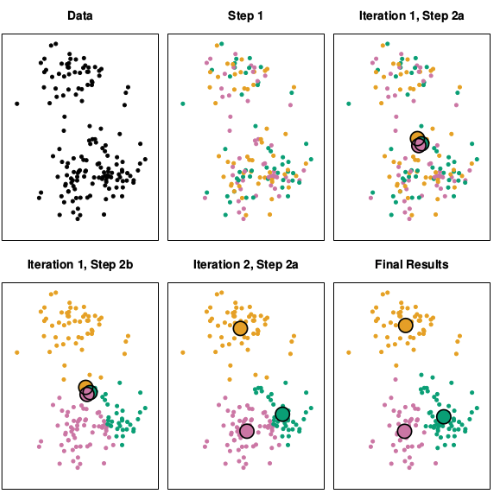
</div>

Otra forma de implementar el algoritmo de *K-means* clustering es la siguiente:
1. Especificar el número K de clusters que se quieren crear.

2. Seleccionar de forma aleatoria $k$ observaciones del set de datos como centroides iniciales.

3. Asignar cada una de las observaciones al centroide más cercano.

4. Para cada uno de los $K$ clusters recalcular su centroide.

5. Repetir los pasos 3 y 4 hasta que las asignaciones no cambien o se alcance el número máximo de iteraciones establecido.

Debido a que el algoritmo de *K-means* no evalúa todas las posibles distribuciones de las observaciones sino solo parte de ellas, los resultados obtenidos dependen de la asignación aleatoria inicial (paso 1). Por esta razón, es importante ejecutar el algoritmo varias veces (25-50), cada una con una asignación aleatoria inicial distinta, y seleccionar aquella que haya conseguido un menor valor de varianza total.

## Ventajas y Desventajas
K-means es uno de los métodos de clustering más utilizados. Destaca por la sencillez y velocidad de su algoritmo, sin embargo, presenta una serie de limitaciones que se deben tener en cuenta.

* Requiere que se indique de antemano el número de clusters que se van a crear. Esto puede ser complicado si no se dispone de información adicional sobre los datos con los que se trabaja. Se han desarrollado varias estrategias para ayudar a identificar potenciales valores óptimos de K (ver más adelante), aunque todas ellas son orientativas.

* Las agrupaciones resultantes pueden variar dependiendo de la asignación aleatoria inicial de los centroides. Para minimizar este problema se recomienda repetir el proceso de clustering entre 25-50 veces y seleccionar como resultado definitivo el que tenga menor suma total de varianza interna. Aun así, solo se puede garantizar la reproducibilidad de los resultados si se emplean semillas.

* Presenta problemas de robustez frente a outliers. La única solución es excluirlos o recurrir a otros métodos de clustering más robustos como K-medoids (PAM).


[1] "Tabla original"
  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa
4          4.6         3.1          1.5         0.2  setosa
5          5.0         3.6          1.4         0.2  setosa
6          5.4         3.9          1.7         0.4  setosa
[1] "Tabla original sin variable respuesta"
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1          5.1         3.5          1.4         0.2
2          4.9         3.0          1.4         0.2
3          4.7         3.2          1.3         0.2
4          4.6         3.1          1.5         0.2
5          5.0         3.6          1.4         0.2
6          5.4         3.9          1.7         0.4
[1] "Tabla estandarizada"
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1   -0.8976739  1.01560199    -1.335752   -1.311052
2   -1.1392005 -0.131

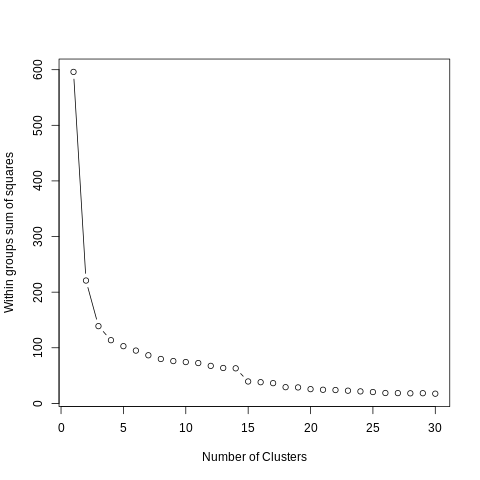

In [12]:
%%R
data(iris)

#Vista de la tabla Iris
print("Tabla original")
print(head(iris))

#Quitar la columna de "Species"
print("Tabla original sin variable respuesta")
iris_2<-iris[-5]
print(head(iris_2))

#Estandardize datos
print("Tabla estandarizada")
iris_3<-as.data.frame(scale(iris_2))
print(head(iris_3))

#Revisar la media y la desviación estándar
print("Media y desviación estándar de la original")
print(sapply(iris_2,mean))
print(sapply(iris_2,sd))
print("Media y desviación estándar de la estandarizada")
print(sapply(iris_3,mean))
print(sapply(iris_3,sd))

# función de gráfica de clusters por suma de cuadrados
wssplot <- function(data, nc=15, seed=1234){
  wss <- (nrow(data)-1)*sum(apply(data,2,var))
  for (i in 2:nc){
    set.seed(seed)
    wss[i] <- sum(kmeans(data, centers=i)$withinss)}
  plot(1:nc, wss, type="b", xlab="Number of Clusters",
       ylab="Within groups sum of squares")}

# ejecuta la gráfica
wssplot(iris_3,nc=30,seed=1234)


[1] "Centroides"
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1    0.3558492  -0.3930869   0.58460377  0.54663615
2    1.3926646   0.2323817   1.15674505  1.21327591
3   -0.4201099  -1.4246794   0.03924137 -0.05279511
4   -0.9987207   0.9032290  -1.29875725 -1.25214931
[1] "Tamaño"
[1] 50 29 22 49
            
              1  2  3  4
  setosa      0  0  1 49
  versicolor 29  2 19  0
  virginica  21 27  2  0


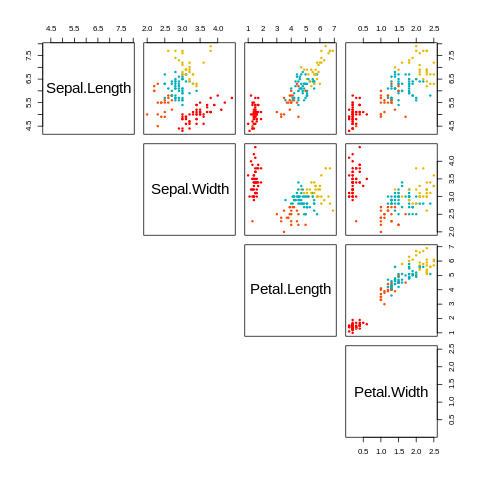

In [13]:
%%R
# Ajustar los clúster
iris_kmeans<-kmeans(iris_3,4)
print("Centroides")
print(iris_kmeans$centers)
print("Tamaño")
print(iris_kmeans$size)
iris$clstr<-iris_kmeans$cluster

# cross-validation with original species available in data

my_cols <- c("#00AFBB", "#E7B800", "#FC4E07", "red", "black", "green", "pink")  
pairs(iris[,1:4], pch = 19,  cex = 0.5,
      col = my_cols[iris$clstr],
      lower.panel=NULL)

iris$clstr<-iris_kmeans$cluster
print(table(iris$Species,iris$clstr))
